In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/indian-currency-notes-classifier/Test/Twentynote/30.jpg
/kaggle/input/indian-currency-notes-classifier/Test/Twentynote/1.jpg
/kaggle/input/indian-currency-notes-classifier/Test/Twentynote/24.jpg
/kaggle/input/indian-currency-notes-classifier/Test/Twentynote/3.jpg
/kaggle/input/indian-currency-notes-classifier/Test/Twentynote/18.jpg
/kaggle/input/indian-currency-notes-classifier/Test/Twentynote/2.jpg
/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/1.jpg
/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/16.jpg
/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/15.jpg
/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/3.jpg
/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/14.jpg
/kaggle/input/indian-currency-notes-classifier/Test/1Hundrednote/2.jpg
/kaggle/input/indian-currency-notes-classifier/Test/5Hundrednote/33.jpg
/kaggle/input/indian-currency-notes-classifier/Test/5Hundrednote/1.jpg
/kaggle/inp

In [78]:
import numpy as np 
import tensorflow as tf 
import tensorflow.keras as keras 
import matplotlib.pyplot as plt 
import cv2 
import os 
import glob
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,mean_squared_error,confusion_matrix
import seaborn as sn
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import random


In [79]:
all_notes,all_labels=[],[]
paths_labels=[
    ('/kaggle/input/indian-currency-notes-classifier/Train/Twentynote/*.jpg',0),
    ('/kaggle/input/indian-currency-notes-classifier/Train/1Hundrednote/*.jpg',1),
    ('/kaggle/input/indian-currency-notes-classifier/Train/5Hundrednote/*.jpg',2),
    ('/kaggle/input/indian-currency-notes-classifier/Train/2Hundrednote/*.jpg',3),
    ('/kaggle/input/indian-currency-notes-classifier/Train/2Thousandnote/*.jpg',4),
    ('/kaggle/input/indian-currency-notes-classifier/Train/Fiftynote/*.jpg',5),
    ('/kaggle/input/indian-currency-notes-classifier/Train/Tennotenote/*.jpg',6)
]

In [80]:
for path, label in paths_labels:
    for img_path in glob.iglob(path):
        img = cv2.imread(img_path)
        if img is None:
            print(f"Failed to load image: {img_path}")
            continue
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        img = cv2.resize(img, (600,600))           
        all_notes.append(img)
        all_labels.append(label)

In [81]:
print(len(all_notes))
print(len(all_labels))

131
131


In [82]:
def show_image(num=10):
    random_indices = random.sample(range(len(all_notes)), num)
    plt.figure(figsize=(15, 5))  # Adjust the figure size as needed
    for i, idx in enumerate(random_indices):
        plt.subplot(1, num, i + 1)
        plt.imshow(all_notes[idx])  # Display the image
        plt.title(all_labels[idx])  # Display the title
        plt.axis('off')
    plt.tight_layout()
    plt.show()
        

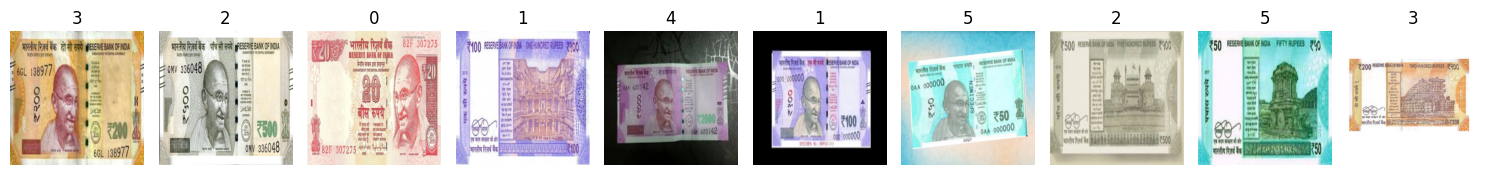

In [83]:
show_image()

In [84]:
all_notes=np.array(all_notes)



In [85]:
print(all_notes.shape)

(131, 600, 600, 3)


In [86]:
print(all_labels[:45])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]


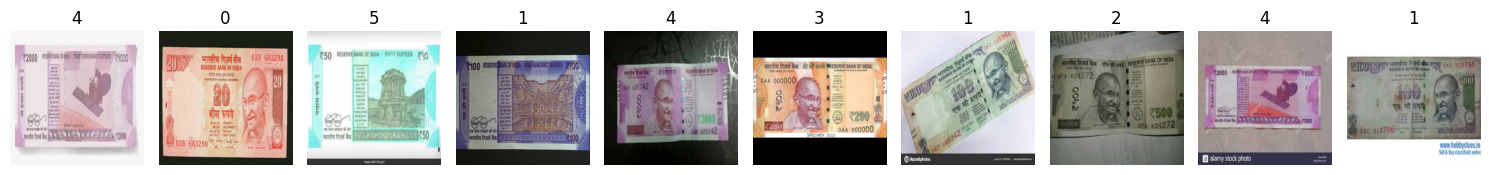

In [87]:
show_image()

In [88]:
all_notes,all_labels=shuffle(all_notes, all_labels, random_state=20)

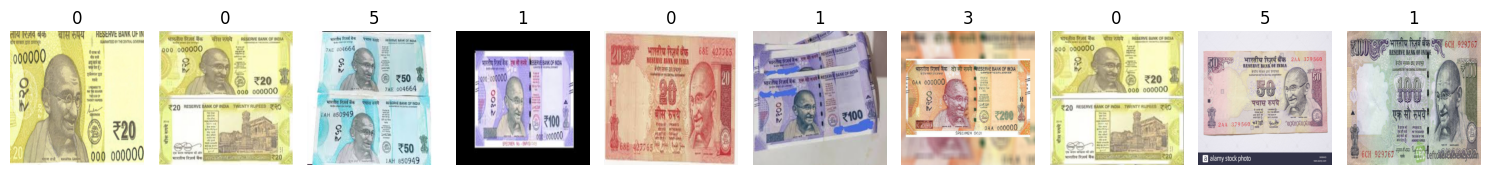

In [89]:
show_image()

In [90]:
X_train, X_test, y_train, y_test = train_test_split(all_notes, all_labels, test_size=0.1, random_state=20)

In [91]:
y_train = to_categorical(y_train, num_classes=8)  # Convert to one-hot
y_test = to_categorical(y_test, num_classes=8)  # Convert to one-hot

In [96]:
base_model = keras.applications.EfficientNetB3(
    include_top=False,  # Exclude the original classification layer
    weights="imagenet",  # Pre-trained weights from ImageNet
    input_shape=(600,600, 3),  
)

# Freeze the base model layers
base_model.trainable = False

# Create the custom model
model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),  # Add another dropout
    keras.layers.Dense(8, activation='softmax')
])

43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [101]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation
    width_shift_range=0.2,  # Horizontal shift
    height_shift_range=0.2,  # Vertical shift
    shear_range=0.2,  # Shearing
    zoom_range=0.3,  # Zoom
    horizontal_flip=True,  # Horizontal flipping
    fill_mode='nearest'  # Fill gaps with nearest pixels
)

# Fit the data generator to your training data
datagen.fit(X_train)
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Use the generator to train the model
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=20),
    epochs=20,  # Increase epochs for better results
    validation_data=(X_test, y_test)
)

Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 108s 9s/step - accuracy: 0.9895 - loss: 0.0684 - val_accuracy: 0.8571 - val_loss: 0.2931
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 337ms/step - accuracy: 1.0000 - loss: 0.0709 - val_accuracy: 0.8571 - val_loss: 0.2967
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.9976 - loss: 0.0544 - val_accuracy: 0.8571 - val_loss: 0.2931
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 1.0000 - loss: 0.0584 - val_accuracy: 0.8571 - val_loss: 0.3487
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.9837 - loss: 0.0584 - val_accuracy: 0.8571 - val_loss: 0.3115
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - accuracy: 0.9976 - loss: 0.0589 - val_accuracy: 0.8571 - val_loss: 0.1937
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - accuracy: 0.9810 - loss: 0.1175 - val_accuracy: 0.8571 - val_loss: 0.3674
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - accuracy: 0.9976 - loss: 0.0738 - val_accuracy: 0.7857 - val

In [107]:
# Evaluate the model on the test data
score = model.evaluate(X_test, y_test, batch_size=32)

# Print the loss and accuracy
print(f"Test Loss: {score[0]}")
print(f"Test Accuracy: {score[1] * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9286 - loss: 0.1883
Test Loss: 0.18826724588871002
Test Accuracy: 92.86%


In [108]:
model.save('notes_detection_model.h5')